<a href="https://colab.research.google.com/github/svparmar/public_engagement_cs/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lesson 3 - Creating a machine learning model

Lets create a machine learning model to predict animals!

1. First we need to read our images in
2. Next, create a dataframe for our images (storing height, width and animal name)
3. After, shuffle our dataset and split into training and test sets
4. Then, train our model
5. After this, test the accuracy of our model
6. Carry out further predictions

# Gathering and Pre-processing our data

In [ ]:
from PIL import Image
import os
import re
import pandas as pd

# Folder storing images name
directory = 'images'

# This line helps us seperrate the filename e.g. giraffe1.png into 'giraffe' and '1'
# Essentially splitting up the letters from the numbers
find_animal_name = re.compile("([a-zA-Z]+)([0-9]+)")

animals=[]
height=[]
width=[]
filenames=[]

# loop through the image folder, finding all animal images and their sizes
for filename in os.listdir(directory):
  try:
  
      # splits file name into animal+number
      print(filename)
      animal_num = find_animal_name.match(filename).groups()
      print(animal_num)

      # animal_num is a list made up of the filename word e.g. giraffe1.
      # animal_num[0] contains giraffe, animal_num[1] contains 1
      animals.append(animal_num[0])

      # Lets read the image in to extract the height and width of each animal
      image = Image.open(f'images/{filename}')
      image_width, image_height = image.size

      # image.shape is a list containing information about the image, which we add to the below lists
      height.append(image_height)
      width.append(image_width)
      filenames.append(f'images/{filename}')
  except:
    pass

In [ ]:
print(animals)
print(height)
print(width)

In [ ]:
# Lets create a dataframe for the image data
image_data = {'Animals':animals, 'Height':height, 'Width':width, 'Image':filenames}
pandas_dataframe = pd.DataFrame(image_data).sample(frac=1)

# Lets have a look at the dataframe
print(pandas_dataframe)

In [5]:
X = pandas_dataframe.iloc[:, 1:4]
y = pandas_dataframe.iloc[:, 0:1]


In [19]:
X

,Height,Width,Image
62,1200,1200,images/elephant22.png
6,1350,620,images/giraffe17.png
3,590,609,images/gorilla5.png
17,602,603,images/gorilla1.png
65,800,600,images/giraffe21.png
...,...,...,...
43,1285,640,images/giraffe2.png
66,1350,640,images/giraffe11.png
58,630,1400,images/elephant5.png
37,1280,638,images/giraffe5.png


In [20]:
y

,Animals
62,elephant
6,giraffe
3,gorilla
17,gorilla
65,giraffe
...,...
43,giraffe
66,giraffe
58,elephant
37,giraffe


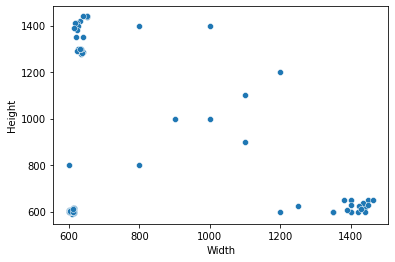

In [21]:
# Plotting what our training data looks like
import seaborn as sns
sns.scatterplot(data=pandas_dataframe, x="Width", y="Height")

In [22]:
# As mentioned in lesson 1, lets split our dataset up so we are able to test the accuracy of our model later
# We split the data that 80% of our animals are used to train the model, and 20% for testing
from sklearn.model_selection import train_test_split
X_train_input_features, X_test_input_features, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.20)

# Remove image filename from the dataset to avoid using in training
X_train_input_features=X_train_input_features.drop(['Image'],axis=1)
#For plotting images later
labels_x_test=X_test_input_features['Image'].tolist()
X_test_input_features=X_test_input_features.drop(['Image'],axis=1)

In [23]:
y_train_labels

,Animals
30,giraffe
68,giraffe
27,elephant
38,giraffe
26,gorilla
43,giraffe
9,elephant
70,giraffe
28,gorilla
11,giraffe


# Choosing and Training our model

In [24]:
# Lets select our model KNN and train it with our training data

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_input_features, y_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# Evaluating and Predicting our model

In [25]:
# Using our trained model, lets see how well it predicts on some unseen data

y_pred = classifier.predict(X_test_input_features)


In [26]:
X_test_input_features

,Height,Width
63,605,605
32,598,602
55,601,600
16,614,613
22,600,1420
54,623,1442
18,900,1100
59,607,1390
57,596,613
17,602,603


We can see that the model is not 100% accurate.

We see that there is flaw, short giraffes may be similar to small gorillas for example, hence it is not 100% accurate.

For example if we pass in a shark into the model what would the model classify it as?

In [27]:
# Lets see the accuracy of our model - how many were guessed correctly?
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

    elephant       0.83      1.00      0.91         5
     giraffe       0.50      0.50      0.50         2
     gorilla       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.73      0.75      0.74        15
weighted avg       0.80      0.80      0.80        15



In [28]:
X_test_input_features

,Height,Width
63,605,605
32,598,602
55,601,600
16,614,613
22,600,1420
54,623,1442
18,900,1100
59,607,1390
57,596,613
17,602,603


In [30]:
print(labels_x_test)


['images/gorilla3.png', 'images/gorilla18.png', 'images/gorilla21.png', 'images/gorilla15.jpg', 'images/elephant14.png', 'images/elephant11.png', 'images/gorilla23.png', 'images/elephant19.png', 'images/gorilla9.jpg', 'images/gorilla1.png', 'images/gorilla22.png', 'images/giraffe9.png', 'images/elephant8.png', 'images/giraffe21.png', 'images/elephant13.png']


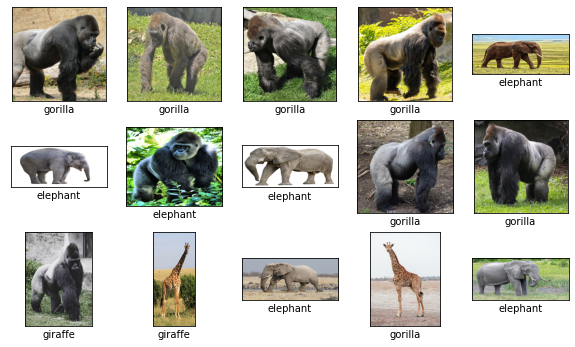

In [31]:

import matplotlib.pyplot as plt
import numpy as np

# Lets see how well the model predicted on the test sizes
plt.figure(figsize=(10,10))
for i in range(len(labels_x_test)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = Image.open(labels_x_test[i])
    im.load()
    image_numpy=np.asarray(im)
    plt.imshow(image_numpy)
    plt.xlabel(y_pred[i])
plt.show()

We can see that the model is not 100% accurate.

We see that there is flaw, short giraffes may be similar to small gorillas for example, hence it is not 100% accurate.

For example if we pass in a shark into the model what would the model classify it as?

In [32]:
# As before, where we used the datta from the train-test split, we can also use other data to see how
# our model interacts with it. Here, only one image is used

animals=[]
numbers=[]
height=[]
width=[]
filenames=[]

# open the shark image, and add the necessary information into lists to create a datatframe
filename='test_shark1.png' 
animals.append('shark')
image = Image.open(f'test/{filename}')
image_width, image_height = image.size
height.append(image_height)
width.append(image_width)
filenames.append(f'test/{filename}')

image_data = {'Animals':animals, 'Height':height, 'Width':width, 'Image':filenames}
pandas_dataframe = pd.DataFrame(image_data).sample(frac=1)

print(pandas_dataframe)
input_features = pandas_dataframe.iloc[:, 1:3].join(pandas_dataframe.iloc[:, 3:4])
actual_labels = pandas_dataframe.iloc[:, 0:1]

filenames_input_features=input_features['Image'].tolist()
input_features=input_features.drop(['Image'],axis=1)

  Animals  Height  Width                 Image
0   shark     700   1400  test/test_shark1.png


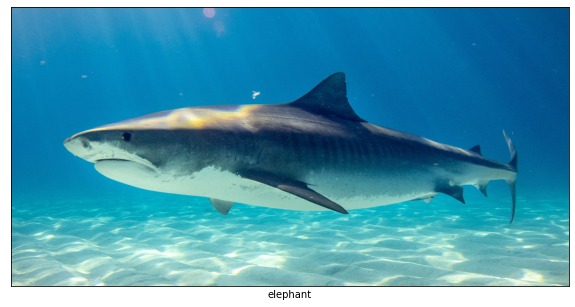

In [33]:
y_pred = classifier.predict(input_features)


# Lets see how well the model predicted for a shark
plt.figure(figsize=(10,10))
for i in range(len(filenames_input_features)):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = Image.open(filenames_input_features[i])
    im.load()
    image_numpy=np.asarray(im)
    plt.imshow(image_numpy)
    plt.xlabel(y_pred[i])
    plt.show()

We can see that the model is not trained to recognise this animal as the dataset is limited to elephants, giraffes and gorillas.